## Car

In [1]:
using TrajectoryOptimization
using Plots, LinearAlgebra

Import the car model

In [2]:
model = Dynamics.car_model
n = model.n # number of states
m = model.m; # number of controls

Define numerical type

In [3]:
T = Float64;

Define initial and goals states

In [4]:
x0 = [0.; 0.; 0.]
xf = [0.; 1.; 0.]

3-element Array{Float64,1}:
 0.0
 1.0
 0.0

Define a cost function, e.g., quadratic

In [5]:
Q = (1.0e-2)*Diagonal(I,n)
R = (1.0e-1)*Diagonal(I,m)
Qf = 1000.0*Diagonal(I,n)
cost = LQRCost(Q, R, Qf, xf);

Define a problem

In [6]:
N = 101 # number of knot points
dt = 0.1 # total time

U = [rand(m) for k = 1:N-1] 
obj = Objective(cost,N) # objective with same stagewise costs

prob = Problem(model,obj, x0=x0, integration=:rk4, N=N, dt=dt)
initial_controls!(prob,U); # initialize problem with controls

Solve problem

In [7]:
solve!(prob, iLQRSolverOptions{T}(verbose=true)) # solve with iLQR

    iter cost          expected    z         α         ρ         dJ        grad      zero_count info                                              
____----------------------------------------------------------------------------------------------------------------------------------------------
    1     10524.64424   10451.7625  0.326366  0.5       0e+00     3411.104  2.464067 0          
    2     2536.3019754  7893.29607  1.012041  0.5       0e+00     7988.342  1.514589 0          
    3     588.85364188  1902.16987  1.023804  0.5       0e+00     1947.448  0.834499 0          
    4     160.12943313  588.806921  0.728124  1         0e+00     428.7242  0.768824 0          
    5     105.92866107  160.123359  0.338494  1         0e+00     54.20077  0.868644 0          
    6     41.27409132   79.4416151  0.813863  0.5       0e+00     64.65457  0.563864 0          
    7     0.0577944722  41.2624842  0.998881  1         0e+00     41.2163   0.759519 0          
    8     0.0125326315  0.0

0.010466164597988778

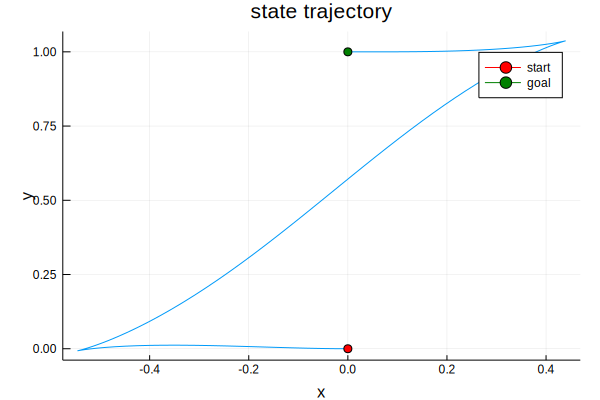

In [8]:
x = [prob.X[k][1] for k = 1:N]
y = [prob.X[k][2] for k = 1:N]

plot(x,y,xlabel="x",ylabel="y",label="",title="state trajectory")
plot!((x[1],y[1]),marker=:circle,color=:red,label="start")
plot!((x[end],y[end]),marker=:circle,color=:green,label="goal")

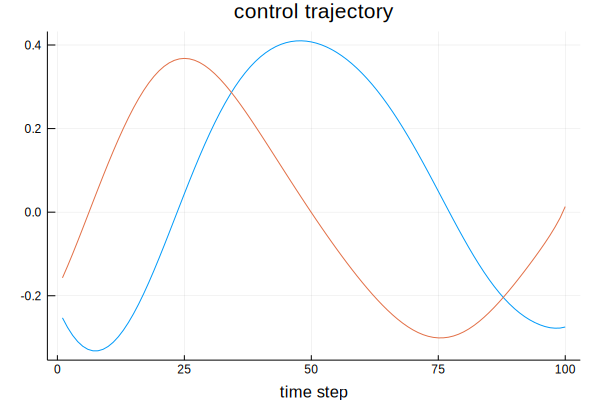

In [9]:
plot(prob.U,xlabel="time step",legend=:none,title="control trajectory")